## 1.Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
pd.options.display.max_columns=None
pd.options.display.max_rows=100

In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from mlxtend.classifier import StackingClassifier

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [7]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report

## 2.Loading the Dataset

In [8]:
df_train=pd.read_csv('C:/Users/Sushree Jena/Desktop/imarticus/machine learning/vindhya/insurance_claim/train.csv')

In [9]:
df_train.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [10]:
df_train.shape

(58592, 44)

In [11]:
df_test=pd.read_csv('C:/Users/Sushree Jena/Desktop/imarticus/machine learning/vindhya/insurance_claim/test.csv')

In [12]:
df_test.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,ID58593,0.341732,0.00,0.586538,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
1,ID58594,0.307241,0.13,0.442308,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,No,Yes,No,Yes,No,Drum,1197,4,Manual,5,Electric,4.8,3845,1735,1530,1335,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
2,ID58595,0.327924,0.12,0.451923,C8,8794,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2
3,ID58596,0.782654,0.01,0.461538,C5,34738,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
4,ID58597,1.233404,0.02,0.634615,C5,34738,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0


In [13]:
df_test.shape

(39063, 43)

## 3.Exploratory Data Analysis

In [184]:
df_train['source']='train'
df_test['source']='test'

df_ins=pd.concat([df_train,df_test],ignore_index=True)

In [185]:
df_ins.shape

(97655, 45)

In [17]:
df_ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97655 entries, 0 to 97654
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         97655 non-null  object 
 1   policy_tenure                     97655 non-null  float64
 2   age_of_car                        97655 non-null  float64
 3   age_of_policyholder               97655 non-null  float64
 4   area_cluster                      97655 non-null  object 
 5   population_density                97655 non-null  int64  
 6   make                              97655 non-null  int64  
 7   segment                           97655 non-null  object 
 8   model                             97655 non-null  object 
 9   fuel_type                         97655 non-null  object 
 10  max_torque                        97655 non-null  object 
 11  max_power                         97655 non-null  object 
 12  engi

In [18]:
df_ins.is_claim.value_counts()

0.0    54844
1.0     3748
Name: is_claim, dtype: int64

In [19]:
df_ins.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,97655.000000,97655.000000,97655.000000,97655.00000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,58592.000000
mean,0.611269,0.069508,0.469287,18822.60809,1.763586,3.138109,1161.655829,3.624423,5.245579,4.853024,3850.017715,1672.050187,1553.214500,1384.966750,1.759664,0.063968
std,0.414494,0.056774,0.122560,17656.79257,1.135832,1.831993,266.560176,0.484274,0.430432,0.228059,311.745860,112.042508,79.385788,212.543007,1.388415,0.244698
min,0.002735,0.000000,0.288462,290.00000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.000000,1051.000000,0.000000,0.000000
25%,0.209729,0.020000,0.375000,6112.00000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.000000,1185.000000,0.000000,0.000000
50%,0.573891,0.060000,0.451923,8794.00000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.000000,1335.000000,2.000000,0.000000
75%,1.039740,0.110000,0.548077,27003.00000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.000000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.00000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.000000,1720.000000,5.000000,1.000000


In [186]:
### Checking for outliers

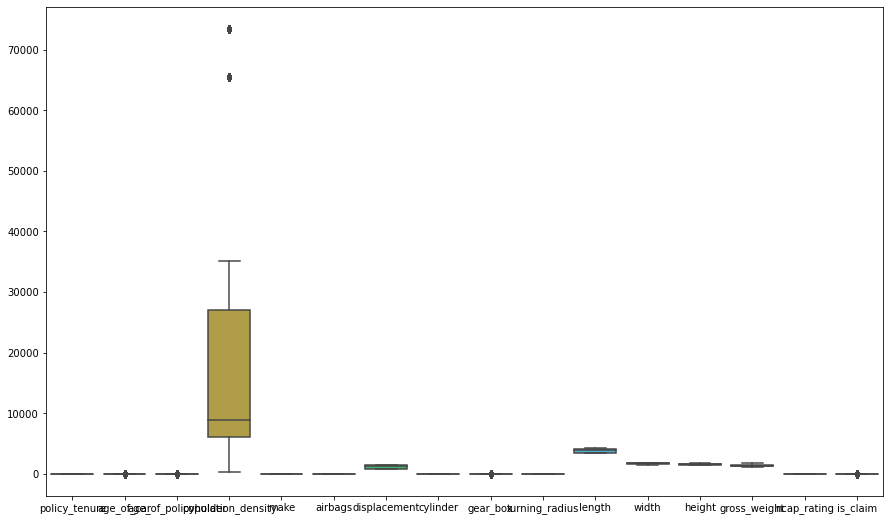

In [21]:
plt.figure(figsize=[15,9])
sns.boxplot(data=df_ins)
plt.show()

We can find that there are some columns with outliers. We need to treat them.

In [22]:
#Treating the outliers

In [23]:
cols=['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'ncap_rating']

In [24]:
def boundaries(data,variable):
    LL=(data[variable].quantile(.25))-(((data[variable].quantile(.75))-(data[variable].quantile(.25)))*1.5)
    UL=(data[variable].quantile(.75))+(((data[variable].quantile(.75))-(data[variable].quantile(.25)))*1.5)
    return LL,UL

In [25]:
for col in cols:
    LL,UL=boundaries(df_ins,col)
    
    df_ins[col]=np.where(df_ins[col]<LL,LL,
                        np.where(df_ins[col]>UL,UL,df_ins[col]))

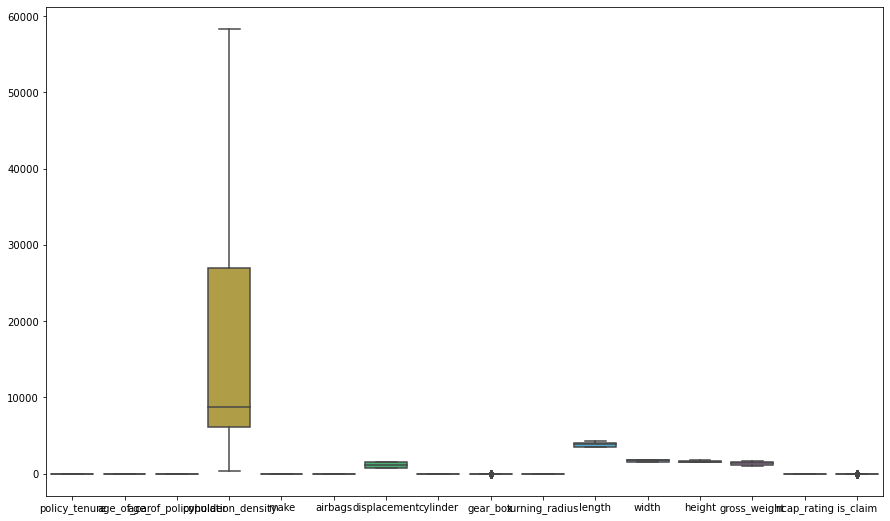

In [26]:
plt.figure(figsize=[15,9])
sns.boxplot(data=df_ins)
plt.show()

The outliers have been treated now.

### Checking for missing values

In [28]:
df_ins.isnull().sum()

policy_id                               0
policy_tenure                           0
age_of_car                              0
age_of_policyholder                     0
area_cluster                            0
population_density                      0
make                                    0
segment                                 0
model                                   0
fuel_type                               0
max_torque                              0
max_power                               0
engine_type                             0
airbags                                 0
is_esc                                  0
is_adjustable_steering                  0
is_tpms                                 0
is_parking_sensors                      0
is_parking_camera                       0
rear_brakes_type                        0
displacement                            0
cylinder                                0
transmission_type                       0
gear_box                          

There are no missing values in the data

### Test for Correlation

In [30]:
vcorr=df_ins.corr()

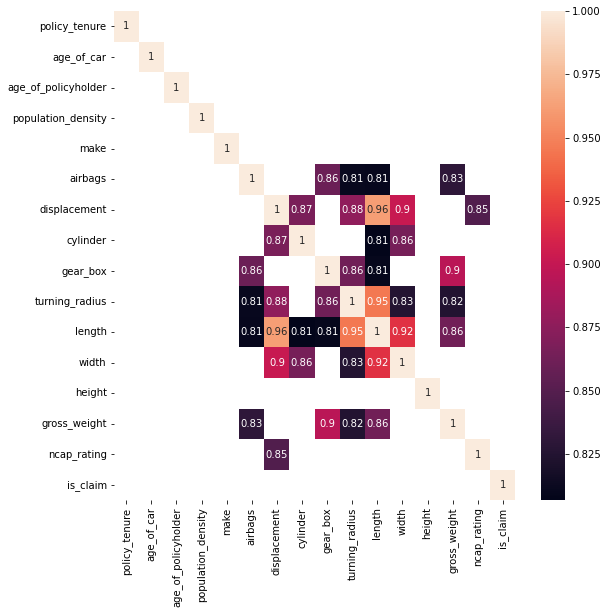

In [31]:
plt.figure(figsize=[9,9])
sns.heatmap(vcorr[(vcorr>0.80) | (vcorr<-0.80)],annot=True)
plt.show()

We can find there are some features which are highly correlated.We need to do the dimensionality reduction using PCA.

In [32]:
df_ins1=df_ins.copy(deep=True)

## 4.Separating the train and test dataset

In [34]:
df_train=df_ins1.loc[df_ins1['source']=='train']
df_test=df_ins1.loc[df_ins1['source']=='test']

In [35]:
df_train.shape,df_test.shape

((58592, 45), (39063, 45))

In [36]:
df_train1=df_train.drop(['policy_id','source'],axis=1)

In [37]:
df_test1=df_test.drop(['policy_id','source','is_claim'],axis=1)

In [38]:
df_train1.shape,df_test1.shape

((58592, 43), (39063, 42))

In [39]:
#Converting the target column datatype to int

In [40]:
df_train1['is_claim']=df_train1['is_claim'].astype('bool')

In [41]:
df_train1['is_claim']=df_train1['is_claim'].astype('int')

## 5.Separating the dependent and independent variables

In [43]:
X_train=df_train1.drop('is_claim',axis=1)

In [44]:
y_train=df_train1['is_claim']

In [45]:
X_test=df_test1

In [46]:
X_train.shape,y_train.shape,X_test.shape

((58592, 42), (58592,), (39063, 42))

## 6.Dummy encoding the categorical variables

In [48]:
X_train_dummy=pd.get_dummies(X_train)

In [49]:
X_train_dummy.shape

(58592, 127)

In [50]:
X_test_dummy=pd.get_dummies(X_test)

In [51]:
X_test_dummy.shape

(39063, 127)

## 7.PCA

In [53]:
#Scaling the data

In [54]:
sc=StandardScaler()

In [55]:
X_train_dummy_scaled=sc.fit_transform(X_train_dummy)
X_train_dummy_scaled=pd.DataFrame(X_train_dummy_scaled,columns=X_train_dummy.columns)
X_train_dummy_scaled.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,area_cluster_C1,area_cluster_C10,area_cluster_C11,area_cluster_C12,area_cluster_C13,area_cluster_C14,area_cluster_C15,area_cluster_C16,area_cluster_C17,area_cluster_C18,area_cluster_C19,area_cluster_C2,area_cluster_C20,area_cluster_C21,area_cluster_C22,area_cluster_C3,area_cluster_C4,area_cluster_C5,area_cluster_C6,area_cluster_C7,area_cluster_C8,area_cluster_C9,segment_A,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility,model_M1,model_M10,model_M11,model_M2,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9,fuel_type_CNG,fuel_type_Diesel,fuel_type_Petrol,max_torque_113Nm@4400rpm,max_torque_170Nm@4000rpm,max_torque_200Nm@1750rpm,max_torque_200Nm@3000rpm,max_torque_250Nm@2750rpm,max_torque_60Nm@3500rpm,max_torque_82.1Nm@3400rpm,max_torque_85Nm@3000rpm,max_torque_91Nm@4250rpm,max_power_113.45bhp@4000rpm,max_power_118.36bhp@5500rpm,max_power_40.36bhp@6000rpm,max_power_55.92bhp@5300rpm,max_power_61.68bhp@6000rpm,max_power_67.06bhp@5500rpm,max_power_88.50bhp@6000rpm,max_power_88.77bhp@4000rpm,max_power_97.89bhp@3600rpm,engine_type_1.0 SCe,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,is_esc_No,is_esc_Yes,is_adjustable_steering_No,is_adjustable_steering_Yes,is_tpms_No,is_tpms_Yes,is_parking_sensors_No,is_parking_sensors_Yes,is_parking_camera_No,is_parking_camera_Yes,rear_brakes_type_Disc,rear_brakes_type_Drum,transmission_type_Automatic,transmission_type_Manual,steering_type_Electric,steering_type_Manual,steering_type_Power,is_front_fog_lights_No,is_front_fog_lights_Yes,is_rear_window_wiper_No,is_rear_window_wiper_Yes,is_rear_window_washer_No,is_rear_window_washer_Yes,is_rear_window_defogger_No,is_rear_window_defogger_Yes,is_brake_assist_No,is_brake_assist_Yes,is_power_door_locks_No,is_power_door_locks_Yes,is_central_locking_No,is_central_locking_Yes,is_power_steering_No,is_power_steering_Yes,is_driver_seat_height_adjustable_No,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_No,is_day_night_rear_view_mirror_Yes,is_ecw_No,is_ecw_Yes,is_speed_alert_No,is_speed_alert_Yes
0,-0.230283,-0.346366,1.431575,-0.855906,-0.671712,-0.620458,-1.375713,-1.296417,-0.570334,-1.108893,-1.301882,-1.402768,-0.983846,-0.942828,-1.266548,6.238013,-0.238561,-0.145335,-0.16696,-0.24909,-0.258124,-0.115474,-0.083013,-0.092023,-0.0644,-0.128516,-0.378495,-0.043172,-0.080688,-0.059544,-0.340924,-0.107145,-0.367720,-0.124194,-0.195972,-0.551218,-0.221236,1.543604,-0.276917,-0.674307,-0.254227,-0.560793,-0.145151,1.708719,-0.145151,-0.078956,-0.137035,-0.205451,-0.560793,-0.167446,-0.554428,-0.229844,-0.276917,-0.19347,1.371877,-0.65871,-0.734482,-0.660469,-0.078956,-0.19347,-0.167446,-0.560793,1.708719,-0.276917,-0.145151,-0.205451,-0.560793,-0.078956,1.708719,-0.276917,-0.145151,-0.205451,-0.660469,-0.167446,-0.19347,-0.205451,-0.229844,-0.137035,-0.560793,-0.167446,-0.078956,1.708719,-0.145151,-0.554428,-0.276917,-0.19347,0.676638,-0.676638,1.241044,-1.241044,0.560793,-0.560793,-0.205451,0.205451,0.800655,-0.800655,-0.560793,0.560793,-0.731153,0.731153,-0.829455,-0.145151,0.865396,1.172863,-1.172863,0.638209,-0.638209,0.638209,-0.638209,0.734014,-0.734014,1.103691,-1.103691,1.620622,-1.620622,1.620622,-1.620622,-0.145151,0.145151,1.187895,-1.187895,0.783393,-0.783393,1.620622,-1.620622,-0.078956,0.078956
1,0.148188,-0.889583,-0.770642,0.597476,-0.671712,-0.620458,-1.375713,-1.296417,-0.570334,-1.108893,-1.301882,-1.402768,-0.983846,-0.942828,-1.266548,-0.160307,-0.238561,-0.145335,-0.16696,-0.24909,-0.258124,-0.115474,-0.083013,-0.092023,-0.0644,-0.128516,2.642042,-0.043172,-0.080688,-0.059544,-0.340924,-0.107145,-0.367720

In [56]:
pca=PCA()

In [57]:
pca_ins1=pca.fit_transform(X_train_dummy_scaled)
pca_ins1

array([[-7.43380940e+00, -3.45140477e+00, -1.22914186e+00, ...,
         2.33672989e-17,  3.97187654e-16, -6.10986362e-15],
       [-7.39296834e+00, -3.41099174e+00, -1.18566251e+00, ...,
         9.82847625e-17, -1.61928855e-16, -7.51032082e-15],
       [-7.45632424e+00, -3.49288928e+00, -1.22551241e+00, ...,
         3.85968031e-16,  9.64400880e-16, -2.63999208e-17],
       ...,
       [-7.37911190e+00, -3.40300209e+00, -1.19774418e+00, ...,
         3.51187014e-17,  4.16306533e-17,  1.77467820e-18],
       [ 2.67344442e-01,  6.37039098e+00,  6.51871324e-01, ...,
         9.06479491e-16, -1.73151675e-16, -5.39524283e-17],
       [ 8.60808321e+00, -4.02761785e+00, -1.99827372e-03, ...,
         8.80221294e-17,  1.95994198e-17, -1.56024838e-17]])

In [58]:
print(np.cumsum(pca.explained_variance_ratio_))

[0.27823089 0.41840089 0.48790182 0.55202889 0.60927003 0.6621434
 0.71039562 0.75047807 0.77974072 0.79950785 0.81586013 0.82589227
 0.83497431 0.84389027 0.85252131 0.86094636 0.86930953 0.87756305
 0.8857311  0.89383334 0.90192251 0.90993971 0.91795545 0.92594709
 0.93391183 0.94186908 0.94979754 0.957711   0.96561535 0.97350426
 0.98122694 0.98826786 0.99431231 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.   

With 34 features, we can capture 100% variance.

In [59]:
df_pca_ins1=pd.DataFrame(pca_ins1[:,:34])
df_pca_ins1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
0,-7.433809,-3.451405,-1.229142,-1.889390,0.623488,0.534766,-0.077590,0.118437,-0.080376,0.022767,-1.478014,0.505861,0.208445,0.196218,-0.131042,1.943829,-1.483278,-1.155255,-1.172201,3.721595,-1.732311,2.133202,-2.261431,0.355507,0.623900,0.635737,0.058006,-0.177933,0.048159,-0.127310,0.441746,1.157064,0.937126,0.684576
1,-7.392968,-3.410992,-1.185663,-1.708121,0.603013,0.524249,-0.095281,0.057780,-0.010148,0.077053,0.647889,-0.436473,1.407938,-1.972099,-1.364649,0.233786,0.009215,-0.221834,-0.151783,-0.280991,-0.135818,-0.068243,-0.063905,0.017705,-0.063070,-0.086021,-0.049514,0.027794,0.006872,0.006556,-0.554960,-0.928295,-0.092239,-0.519990
2,-7.456324,-3.492889,-1.225512,-1.839006,0.603566,0.540055,-0.070855,0.054488,-0.038040,-0.023938,-1.774034,-0.376859,-0.038884,-0.448624,0.309047,-1.926116,0.914402,0.479562,0.138919,-0.129153,0.077727,0.181363,-0.170141,0.035883,0.095231,0.098232,0.001296,-0.026803,0.011998,-0.030573,0.254357,-0.038068,1.103357,-0.704495
3,2.603438,4.319758,-0.497721,-0.071060,1.583748,2.022513,0.401995,-3.175442,3.644917,10.779949,-0.097889,-0.065935,-0.359968,-0.170020,0.596564,0.776558,-0.136099,-0.852161,0.882980,-0.529387,-1.089958,-0.468924,2.847246,-2.963969,7.267184,-2.880035,-0.182822,-1.089150,-0.272755,-0.324162,-0.382466,1.213727,1.296824,0.106842
4,-2.538634,1.898281,-4.531206,9.634094,7.434974,-2.892958,1.181360,0.894359,-1.081424,-0.119328,1.561037,0.949231,-0.304298,2.119787,-1.440714,-0.356609,0.185129,0.051769,-0.143051,-0.002705,0.090891,-0.055804,-0.163207,0.069502,-0.045236,-0.085182,0.054212,-0.042653,-0.018978,-0.023322,-0.087691,0.787996,0.465104,0.922418


So, our X_train_dummy_scaled is df_pca_ins1

In [60]:
X_train_dummy_scaled=df_pca_ins1

In [61]:
#PCA for test set

In [62]:
X_test_dummy_scaled=sc.transform(X_test_dummy)
X_test_dummy_scaled=pd.DataFrame(X_test_dummy_scaled,columns=X_test_dummy.columns)
X_test_dummy_scaled.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,area_cluster_C1,area_cluster_C10,area_cluster_C11,area_cluster_C12,area_cluster_C13,area_cluster_C14,area_cluster_C15,area_cluster_C16,area_cluster_C17,area_cluster_C18,area_cluster_C19,area_cluster_C2,area_cluster_C20,area_cluster_C21,area_cluster_C22,area_cluster_C3,area_cluster_C4,area_cluster_C5,area_cluster_C6,area_cluster_C7,area_cluster_C8,area_cluster_C9,segment_A,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility,model_M1,model_M10,model_M11,model_M2,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9,fuel_type_CNG,fuel_type_Diesel,fuel_type_Petrol,max_torque_113Nm@4400rpm,max_torque_170Nm@4000rpm,max_torque_200Nm@1750rpm,max_torque_200Nm@3000rpm,max_torque_250Nm@2750rpm,max_torque_60Nm@3500rpm,max_torque_82.1Nm@3400rpm,max_torque_85Nm@3000rpm,max_torque_91Nm@4250rpm,max_power_113.45bhp@4000rpm,max_power_118.36bhp@5500rpm,max_power_40.36bhp@6000rpm,max_power_55.92bhp@5300rpm,max_power_61.68bhp@6000rpm,max_power_67.06bhp@5500rpm,max_power_88.50bhp@6000rpm,max_power_88.77bhp@4000rpm,max_power_97.89bhp@3600rpm,engine_type_1.0 SCe,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,is_esc_No,is_esc_Yes,is_adjustable_steering_No,is_adjustable_steering_Yes,is_tpms_No,is_tpms_Yes,is_parking_sensors_No,is_parking_sensors_Yes,is_parking_camera_No,is_parking_camera_Yes,rear_brakes_type_Disc,rear_brakes_type_Drum,transmission_type_Automatic,transmission_type_Manual,steering_type_Electric,steering_type_Manual,steering_type_Power,is_front_fog_lights_No,is_front_fog_lights_Yes,is_rear_window_wiper_No,is_rear_window_wiper_Yes,is_rear_window_washer_No,is_rear_window_washer_Yes,is_rear_window_defogger_No,is_rear_window_defogger_Yes,is_brake_assist_No,is_brake_assist_Yes,is_power_door_locks_No,is_power_door_locks_Yes,is_central_locking_No,is_central_locking_Yes,is_power_steering_No,is_power_steering_Yes,is_driver_seat_height_adjustable_No,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_No,is_day_night_rear_view_mirror_Yes,is_ecw_No,is_ecw_Yes,is_speed_alert_No,is_speed_alert_Yes
0,-0.650761,-1.251728,0.959671,-0.916251,-0.671712,-0.620458,-1.375713,-1.296417,-0.570334,-1.108893,-1.301882,-1.402768,-0.983846,-0.942828,-1.266548,-0.160307,-0.238561,-0.145335,-0.16696,-0.24909,-0.258124,-0.115474,-0.083013,-0.092023,-0.0644,-0.128516,-0.378495,-0.043172,-0.080688,-0.059544,2.933202,-0.107145,-0.367720,-0.124194,-0.195972,-0.551218,-0.221236,1.543604,-0.276917,-0.674307,-0.254227,-0.560793,-0.145151,1.708719,-0.145151,-0.078956,-0.137035,-0.205451,-0.560793,-0.167446,-0.554428,-0.229844,-0.276917,-0.19347,1.371877,-0.65871,-0.734482,-0.660469,-0.078956,-0.19347,-0.167446,-0.560793,1.708719,-0.276917,-0.145151,-0.205451,-0.560793,-0.078956,1.708719,-0.276917,-0.145151,-0.205451,-0.660469,-0.167446,-0.19347,-0.205451,-0.229844,-0.137035,-0.560793,-0.167446,-0.078956,1.708719,-0.145151,-0.554428,-0.276917,-0.19347,0.676638,-0.676638,1.241044,-1.241044,0.560793,-0.560793,-0.205451,0.205451,0.800655,-0.800655,-0.560793,0.560793,-0.731153,0.731153,-0.829455,-0.145151,0.865396,1.172863,-1.172863,0.638209,-0.638209,0.638209,-0.638209,0.734014,-0.734014,1.103691,-1.103691,1.620622,-1.620622,1.620622,-1.620622,-0.145151,0.145151,1.187895,-1.187895,0.783393,-0.783393,1.620622,-1.620622,-0.078956,0.078956
1,-0.734040,1.102211,-0.220088,-0.604751,-0.671712,-0.620458,0.130093,0.771357,-0.570334,-0.231926,-0.017585,0.559973,-0.293078,-0.236684,0.172752,-0.160307,-0.238561,-0.145335,-0.16696,-0.24909,-0.258124,-0.115474,-0.083013,-0.092023,-0.0644,-0.128516,-0.378495,-0.043172,-0.080688,-0.059544,-0.340924,-0.107145,-0.367720,-

In [63]:
pca1=PCA()

In [64]:
pca_ins2=pca1.fit_transform(X_test_dummy_scaled)
pca_ins2

array([[-7.51330470e+00, -3.54820967e+00, -8.80449133e-01, ...,
        -1.73918914e-16, -5.37751785e-15,  1.38660560e-15],
       [ 1.99858968e-01,  6.30572690e+00, -1.72748114e+00, ...,
         3.40032676e-16, -2.16686611e-14,  2.70242537e-15],
       [-2.39335673e+00,  2.14082396e+00,  1.15849667e+01, ...,
         9.69146195e-16,  1.54215890e-15, -3.41355519e-16],
       ...,
       [ 4.17115562e+00,  3.39935312e+00, -9.36604676e-01, ...,
         9.87017235e-17, -1.32953859e-16,  1.97923710e-16],
       [ 2.57869767e+00,  4.35756804e+00,  2.57667787e-01, ...,
         7.49978048e-16,  8.81608081e-17,  3.28763066e-16],
       [ 8.74696551e+00, -3.90734343e+00, -2.08885458e-01, ...,
        -2.69856967e-18, -1.85231995e-16, -3.16659097e-17]])

In [65]:
print(np.cumsum(pca1.explained_variance_ratio_))

[0.28051809 0.42048139 0.48746277 0.55127644 0.6095426  0.66229584
 0.70989723 0.74988081 0.77906286 0.79867398 0.81513389 0.82526314
 0.83457592 0.84378827 0.85277526 0.86158028 0.87028782 0.87886693
 0.88734065 0.89565667 0.90393877 0.91219642 0.92038003 0.92851365
 0.93662953 0.94472176 0.95273811 0.96069543 0.96802576 0.9752234
 0.98205002 0.98833198 0.99430837 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.   

With 34 features we can capture 100% variance.

In [66]:
df_pca_ins2=pd.DataFrame(pca_ins2[:,:34])
df_pca_ins2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
0,-7.513305,-3.548210,-0.880449,-2.214004,0.183892,0.398312,-0.059739,0.063131,-0.056553,0.066469,-1.640663,0.122984,-0.216881,-0.119203,0.055871,-0.597000,0.578750,-1.243040,1.570144,0.047870,-0.428768,-0.048777,-0.154155,-0.183605,-0.002305,-0.292468,-0.043426,0.440327,-0.591330,0.632577,-0.929170,0.017935,-0.057626,0.141889
1,0.199859,6.305727,-1.727481,-0.390031,-0.232566,-0.825542,0.450908,0.473683,-1.499561,-0.160197,-0.720296,-0.274951,1.035901,-0.993700,0.045872,0.051828,0.104689,-0.023747,-0.074185,-0.381819,-0.061432,0.011973,0.060322,-0.216580,0.027212,0.099836,-0.225325,0.111946,0.553303,-0.385774,0.402902,-0.216739,-0.595245,0.903994
2,-2.393357,2.140824,11.584967,0.087568,5.967199,-2.660973,0.802768,0.727104,-1.098417,-0.156775,-1.024278,-0.685819,1.108193,-0.992536,0.071192,0.092997,0.214276,-0.042272,-0.148611,-0.425933,-0.012552,0.020801,0.013399,-0.154126,0.087650,0.087328,-0.143496,0.110411,0.461475,-0.335294,0.340267,-0.225948,-0.663285,0.893263
3,-7.450263,-3.468738,-0.794982,-2.066767,0.185470,0.382756,-0.054157,0.070154,0.013291,0.011906,1.366929,-0.831838,-0.134704,0.012322,-2.047753,0.039616,-1.162564,-0.068638,0.162020,-0.292322,-0.041041,-0.257577,0.040607,0.097918,-0.112862,0.019426,-0.043286,-0.213897,0.106794,-0.542637,0.294703,0.024481,0.426984,-0.719150
4,-7.406559,-3.417817,-0.813833,-2.061268,0.194343,0.357698,-0.038168,0.102457,-0.045515,0.006524,1.258945,-2.080827,-0.396078,0.437975,-1.994347,-0.101557,-1.279854,-0.075572,0.117660,-0.115653,0.053274,-0.215930,-0.085513,0.256577,-0.129557,-0.049106,0.177983,-0.544012,-0.408617,-0.251381,-0.406290,0.089905,0.926861,-0.620983


So, our X_test_dummy_scaled is df_pca_ins2

In [67]:
X_test_dummy_scaled=df_pca_ins2

In [68]:
#Checking the shapes

In [69]:
X_train_dummy_scaled.shape,X_test_dummy_scaled.shape,y_train.shape

((58592, 34), (39063, 34), (58592,))

## 8.SMOTE

In [71]:
oversample=SMOTE()

In [72]:
X_train_dummy_scaled,y_train=oversample.fit_resample(X_train_dummy_scaled,y_train)

In [73]:
X_train_dummy_scaled.shape,X_test_dummy_scaled.shape,y_train.shape

((109688, 34), (39063, 34), (109688,))

## 9.Scaling the Data

In [75]:
sc=StandardScaler()

In [76]:
X_train=sc.fit_transform(X_train_dummy_scaled)
X_test=sc.transform(X_test_dummy_scaled)

In [77]:
X_train.shape,X_test.shape,y_train.shape

((109688, 34), (39063, 34), (109688,))

## 10.Model Building 

1.Logistic Regression

In [79]:
lr=LogisticRegression()

In [80]:
lr.fit(X_train,y_train)

LogisticRegression()

In [81]:
y_pred_train=lr.predict(X_train)

In [82]:
y_pred_test=lr.predict(X_test)

In [83]:
print('Training Accuracy is: ',accuracy_score(y_train,y_pred_train))
print('Training Recall_score is: ',recall_score(y_train,y_pred_train))
print('Training Precision_score is: ',precision_score(y_train,y_pred_train))
print('Training f1_score is: ',f1_score(y_train,y_pred_train))

Training Accuracy is:  0.5908485887243818
Training Recall_score is:  0.6084530668806069
Training Precision_score is:  0.5877586966094231
Training f1_score is:  0.5979268762486674


In [84]:
submit_lr=pd.DataFrame({'policy_id':df_test['policy_id'],'is_claim':y_pred_test})

In [85]:
submit_lr.to_csv('insurance_claim.submit_lr.csv',index=False)

2.Decision Tree

In [86]:
dt=DecisionTreeClassifier()

In [87]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [88]:
y_pred_train=dt.predict(X_train)

In [89]:
y_pred_test=dt.predict(X_test)

In [90]:
print('Training Accuracy is: ',accuracy_score(y_train,y_pred_train))
print('Training Recall_score is: ',recall_score(y_train,y_pred_train))
print('Training Precision_score is: ',precision_score(y_train,y_pred_train))
print('Training f1_score is: ',f1_score(y_train,y_pred_train))

Training Accuracy is:  1.0
Training Recall_score is:  1.0
Training Precision_score is:  1.0
Training f1_score is:  1.0


In [91]:
submit_dt=pd.DataFrame({'policy_id':df_test['policy_id'],'is_claim':y_pred_test})

In [92]:
submit_dt.to_csv('insurance_claim.submit_dt.csv',index=False)

3.Random Forest

In [93]:
rf=RandomForestClassifier()

In [94]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [95]:
y_pred_train=rf.predict(X_train)

In [96]:
y_pred_test=rf.predict(X_test)

In [97]:
print('Training Accuracy is: ',accuracy_score(y_train,y_pred_train))
print('Training Recall_score is: ',recall_score(y_train,y_pred_train))
print('Training Precision_score is: ',precision_score(y_train,y_pred_train))
print('Training f1_score is: ',f1_score(y_train,y_pred_train))

Training Accuracy is:  0.9999726496973234
Training Recall_score is:  1.0
Training Precision_score is:  0.9999453023866391
Training f1_score is:  0.9999726504453419


In [98]:
submit_rf=pd.DataFrame({'policy_id':df_test['policy_id'],'is_claim':y_pred_test})

In [99]:
submit_rf.to_csv('insurance_claim.submit_rf.csv',index=False)

4.XGBClassifier

In [100]:
xgb=XGBClassifier()

In [101]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [102]:
y_pred_train=xgb.predict(X_train)

In [103]:
y_pred_test=xgb.predict(X_test)

In [104]:
print('Training Accuracy is: ',accuracy_score(y_train,y_pred_train))
print('Training Recall_score is: ',recall_score(y_train,y_pred_train))
print('Training Precision_score is: ',precision_score(y_train,y_pred_train))
print('Training f1_score is: ',f1_score(y_train,y_pred_train))

Training Accuracy is:  0.7874699146670556
Training Recall_score is:  0.8778535482459339
Training Precision_score is:  0.7434602674573025
Training f1_score is:  0.8050868714569991


In [105]:
submit_xgb=pd.DataFrame({'policy_id':df_test['policy_id'],'is_claim':y_pred_test})

In [106]:
submit_xgb.to_csv('insurance_claim.submit_xgb.csv',index=False)

5.GradientBoosting

In [107]:
gb=GradientBoostingClassifier()

In [108]:
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [109]:
y_pred_train=gb.predict(X_train)

In [110]:
y_pred_test=gb.predict(X_test)

In [111]:
print('Training Accuracy is: ',accuracy_score(y_train,y_pred_train))
print('Training Recall_score is: ',recall_score(y_train,y_pred_train))
print('Training Precision_score is: ',precision_score(y_train,y_pred_train))
print('Training f1_score is: ',f1_score(y_train,y_pred_train))

Training Accuracy is:  0.6429144482532273
Training Recall_score is:  0.7322405367952739
Training Precision_score is:  0.6212524364963955
Training f1_score is:  0.6721959057964949


In [112]:
submit_gb=pd.DataFrame({'policy_id':df_test['policy_id'],'is_claim':y_pred_test})

In [113]:
submit_gb.to_csv('insurance_claim.submit_gb.csv',index=False)

6.AdaBoostClassifier

In [330]:
ab=AdaBoostClassifier()

In [331]:
ab.fit(X_train,y_train)

AdaBoostClassifier()

In [332]:
y_pred_train=ab.predict(X_train)

In [333]:
y_pred_test=ab.predict(X_test)

In [334]:
print('Training Accuracy is: ',accuracy_score(y_train,y_pred_train))
print('Training Recall_score is: ',recall_score(y_train,y_pred_train))
print('Training Precision_score is: ',precision_score(y_train,y_pred_train))
print('Training f1_score is: ',f1_score(y_train,y_pred_train))

Training Accuracy is:  0.6105772737218292
Training Recall_score is:  0.6831011596528335
Training Precision_score is:  0.5965700090765776
Training f1_score is:  0.6369099733940821


In [335]:
submit_ab=pd.DataFrame({'policy_id':df_test['policy_id'],'is_claim':y_pred_test})

In [336]:
submit_ab.to_csv('insurance_claim.submit_ab.csv',index=False)

7.LGBMClassifier

In [114]:
lgbm=LGBMClassifier()

In [115]:
lgbm.fit(X_train,y_train)

LGBMClassifier()

In [116]:
y_pred_train=lgbm.predict(X_train)

In [117]:
y_pred_test=lgbm.predict(X_test)

In [118]:
print('Training Accuracy is: ',accuracy_score(y_train,y_pred_train))
print('Training Recall_score is: ',recall_score(y_train,y_pred_train))
print('Training Precision_score is: ',precision_score(y_train,y_pred_train))
print('Training f1_score is: ',f1_score(y_train,y_pred_train))

Training Accuracy is:  0.7302166143971993
Training Recall_score is:  0.8332907884180585
Training Precision_score is:  0.6908692365835223
Training f1_score is:  0.7554258888870523


In [119]:
submit_lgbm=pd.DataFrame({'policy_id':df_test['policy_id'],'is_claim':y_pred_test})

In [120]:
submit_lgbm.to_csv('insurance_claim.submit_lgbm.csv',index=False)

8.Naive Bayes

In [121]:
nb=GaussianNB()

In [122]:
nb.fit(X_train,y_train)

GaussianNB()

In [123]:
y_pred_train=nb.predict(X_train)

In [124]:
y_pred_test=nb.predict(X_test)

In [125]:
print('Training Accuracy is: ',accuracy_score(y_train,y_pred_train))
print('Training Recall_score is: ',recall_score(y_train,y_pred_train))
print('Training Precision_score is: ',precision_score(y_train,y_pred_train))
print('Training f1_score is: ',f1_score(y_train,y_pred_train))

Training Accuracy is:  0.5525855152797025
Training Recall_score is:  0.6788162789001532
Training Precision_score is:  0.5419857330033484
Training f1_score is:  0.6027328508750627


In [126]:
submit_nb=pd.DataFrame({'policy_id':df_test['policy_id'],'is_claim':y_pred_test})

In [127]:
submit_nb.to_csv('insurance_claim.submit_nb.csv',index=False)

9.KNN

In [128]:
k_values=range(3,21)

In [129]:
acc_score={}

In [130]:
for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred_train=knn.predict(X_train)
    y_pred_test=knn.predict(X_test)
    acc_score[k]=accuracy_score(y_train,y_pred_train)

In [131]:
max(acc_score.values())

0.9189792867041062

In [132]:
 max(acc_score,key=acc_score.get)

3

In [133]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred_train=knn.predict(X_train)
y_pred_test=knn.predict(X_test)

In [134]:
print('Training Accuracy is: ',accuracy_score(y_train,y_pred_train))
print('Training Recall_score is: ',recall_score(y_train,y_pred_train))
print('Training Precision_score is: ',precision_score(y_train,y_pred_train))
print('Training f1_score is: ',f1_score(y_train,y_pred_train))

Training Accuracy is:  0.9189792867041062
Training Recall_score is:  0.974290715483918
Training Precision_score is:  0.8772471310600712
Training f1_score is:  0.9232257785840785


In [135]:
submit_knn=pd.DataFrame({'policy_id':df_test['policy_id'],'is_claim':y_pred_test})

In [136]:
submit_knn.to_csv('insurance_claim.submit_knn.csv',index=False)

10.Neural Network

In [137]:
classifier=Sequential()

In [138]:
X_train.shape,y_train.shape

((109688, 34), (109688,))

In [139]:
classifier.add(Dense(34,kernel_initializer='uniform',activation='relu',input_dim=34))
classifier.add(Dense(34,kernel_initializer='uniform',activation='relu'))

In [140]:
classifier.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))

In [141]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [142]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 34)                1190      
                                                                 
 dense_1 (Dense)             (None, 34)                1190      
                                                                 
 dense_2 (Dense)             (None, 1)                 35        
                                                                 
Total params: 2,415
Trainable params: 2,415
Non-trainable params: 0
_________________________________________________________________


In [143]:
classifier.fit(X_train,y_train,batch_size=32,epochs=50)

Epoch 1/50
3428/3428 [==============================] - 5s 1ms/step - loss: 0.6511 - accuracy: 0.6118
Epoch 2/50
3428/3428 [==============================] - 5s 1ms/step - loss: 0.6301 - accuracy: 0.6343
Epoch 3/50
3428/3428 [==============================] - 6s 2ms/step - loss: 0.6197 - accuracy: 0.6462
Epoch 4/50
3428/3428 [==============================] - 10s 3ms/step - loss: 0.6118 - accuracy: 0.6578
Epoch 5/50
3428/3428 [==============================] - 9s 3ms/step - loss: 0.6048 - accuracy: 0.6636
Epoch 6/50
3428/3428 [==============================] - 9s 2ms/step - loss: 0.5986 - accuracy: 0.6719
Epoch 7/50
3428/3428 [==============================] - 9s 3ms/step - loss: 0.5929 - accuracy: 0.6760
Epoch 8/50
3428/3428 [==============================] - 8s 2ms/step - loss: 0.5881 - accuracy: 0.6806
Epoch 9/50
3428/3428 [==============================] - 9s 3ms/step - loss: 0.5835 - accuracy: 0.6842
Epoch 10/50
3428/3428 [==============================] - 9s 2ms/step - loss: 0.57

In [144]:
y_pred_test=classifier.predict(X_test)

1221/1221 [==============================] - 1s 938us/step


In [145]:
y_pred_test=np.round(y_pred_test)

In [146]:
y_pred_train=classifier.predict(X_train)

3428/3428 [==============================] - 5s 2ms/step


In [147]:
y_pred_train=np.round(y_pred_train)

In [148]:
print('Training Accuracy is: ',accuracy_score(y_train,y_pred_train))
print('Training Recall_score is: ',recall_score(y_train,y_pred_train))
print('Training Precision_score is: ',precision_score(y_train,y_pred_train))
print('Training f1_score is: ',f1_score(y_train,y_pred_train))

Training Accuracy is:  0.7305812850995551
Training Recall_score is:  0.8028590183064692
Training Precision_score is:  0.7014592493468426
Training f1_score is:  0.7487416678002993


In [149]:
y_pred_test=y_pred_test.flatten()

In [150]:
y_pred_test

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [151]:
submit_NN=pd.DataFrame({'policy_id':df_test['policy_id'],'is_claim':y_pred_test})

In [152]:
submit_NN.to_csv('insurance_claim.submit_NN.csv',index=False)

11.Stacking

In [167]:
dt1=DecisionTreeClassifier()

In [177]:
stack=StackingClassifier(classifiers=[lr,dt,gb,nb,lgbm,knn],meta_classifier=dt1)

In [178]:
model_stack=stack.fit(X_train,y_train)

In [179]:
pred_stack_train=model_stack.predict(X_train)

In [180]:
pred_stack_test=model_stack.predict(X_test)

In [181]:
print('Training Accuracy is: ',accuracy_score(y_train,pred_stack_train))
print('Training Recall_score is: ',recall_score(y_train,pred_stack_train))
print('Training Precision_score is: ',precision_score(y_train,pred_stack_train))
print('Training f1_score is: ',f1_score(y_train,pred_stack_train))

Training Accuracy is:  1.0
Training Recall_score is:  1.0
Training Precision_score is:  1.0
Training f1_score is:  1.0


In [182]:
submit_stacking=pd.DataFrame({'policy_id':df_test['policy_id'],'is_claim':pred_stack_test})

In [183]:
submit_stacking.to_csv('insurance_claim.submit_stacking.csv',index=False)